# Introduction 
- Many classes, but very few samples for each

### Libraries:

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import glob
import sys
import random 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

import torchvision
import torchvision.utils
import torchvision.models as models
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

from data_utils import create_validation_data
use_gpu = torch.cuda.is_available()

In [2]:
use_gpu

False

In [34]:
batch_size = 16
embed_size = 128
num_epochs = 50

cnn = 'resnet101'

### Helper methods 

In [17]:
def get_model(model_name, pretrained=True):
    return models.__dict__[model_name](pretrained)

def imshow(img, text=None):
    img_np = img.numpy().transpose((1, 2, 0))
    plt.axis('off')
    if text:
        plt.text(175, 8, text, style='italic', fontweight='bold', bbox={'facecolor': 'white', 'alpha': 0.8, 'pad':10})
        
    plt.imshow(img_np)
    plt.show()

## Data

- Data direction in hard disk = DATA_DIR
- train va test ro address midim = train_dir
- Dataset
-Dataloader


In [18]:
DATA_DIR = '/Users/mahrokh/Desktop/facegit/'

In [19]:
os.listdir(DATA_DIR)[0:5] #printint inside DATA_DIR directory

['valid', '.DS_Store', 'Training', 'Testing']

In [20]:
train_dir = f'{DATA_DIR}Training'
test_dir = f'{DATA_DIR}Testing'
valid_dir = f'{DATA_DIR}valid'

In [21]:
os.listdir(train_dir)[:4]

['s34', 's33', 's5', 's2']

In [22]:
trn_fnames = glob.glob(f"{train_dir}/*/*")
trn_fnames[:5]

['/Users/mahrokh/Desktop/facegit/Training/s34/7.pgm',
 '/Users/mahrokh/Desktop/facegit/Training/s34/6.pgm',
 '/Users/mahrokh/Desktop/facegit/Training/s34/4.pgm',
 '/Users/mahrokh/Desktop/facegit/Training/s34/5.pgm',
 '/Users/mahrokh/Desktop/facegit/Training/s34/1.pgm']

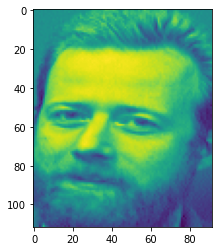

In [23]:
img = plt.imread(trn_fnames[77])
plt.imshow(img);

In [24]:
test_fnames = glob.glob(f'{test_dir}/*/*')
test_fnames[:5]

['/Users/mahrokh/Desktop/facegit/Testing/s34/34.pgm',
 '/Users/mahrokh/Desktop/facegit/Testing/s33/33.pgm',
 '/Users/mahrokh/Desktop/facegit/Testing/s5/5.pgm',
 '/Users/mahrokh/Desktop/facegit/Testing/s2/2.pgm',
 '/Users/mahrokh/Desktop/facegit/Testing/s32/32.pgm']

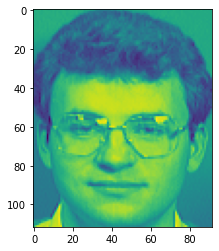

In [25]:
img = plt.imread(test_fnames[22])
plt.imshow(img);

#### initialization

In [26]:
sz = 200
batch_size = 128
num_epochs = 50

cnn_name = 'resnet152'

In [27]:
# make validation dataset
if not os.path.exists(valid_dir):
    create_validation_data(train_dir, valid_dir, split=0.2, ext = 'pgm')

# Dataset
- init
- getitem
- len

In [28]:
class TripleNetworkDataset(Dataset):
    
    def __init__(self, imgs, transform=None):
        self.imgs = imgs
        self.transform = transform
        if transform is None:
            self.transform = transform.ToTensor() # only tensor for pytorch
            
    def __getitem__(self, index):
        anchore, anchore_label = self.imgs[index]
        
        positive = random.choice([img for img, lbl in self.imgs if lbl== anchore_label])
        negetive = random.choice([img for img, lbl in self.imgs if lbl!= anchore_label])
        
        anc_img = Image.open(anchore).convert('RGB')
        pos_img = Image.open(positive).convert('RGB')
        neg_img = Image.open(negetive).convert('RGB')
        
        if self.transform is not None:
            anc_img = self.transform(anc_img)
            pos_img = self.transform(pos_img)
            neg_img = self.transform(neg_img)
        
        return anc_img, pos_img, neg_img
        
        
    def __len__(self):
        return len(self.imgs)

## Training data

In [31]:
zoom = int((1.0 + random.random()/10) * sz)

tfms = transforms.Compose([
    transforms.Resize((zoom, zoom)), 
    transforms.RandomCrop(sz), 
    transforms.RandomHorizontalFlip(), 
    transforms.RandomRotation(5), 
    transforms.ToTensor()])

# training data
face_dataset = datasets.ImageFolder(train_dir)
train_ds = TripleNetworkDataset(face_dataset.imgs, transform=tfms)
train_dl = DataLoader(train_ds, batch_size=8, shuffle=True, num_workers=0)

# valid data
#face_dataset = datasets.ImageFolder(valid_dir)
#valid_ds = TripleNetworkDataset(face_dataset.imgs, transform=tfms)
#valid_dl = DataLoader(valid_ds, batch_size=16, shuffle=True, num_workers=8)

### visualize dataset

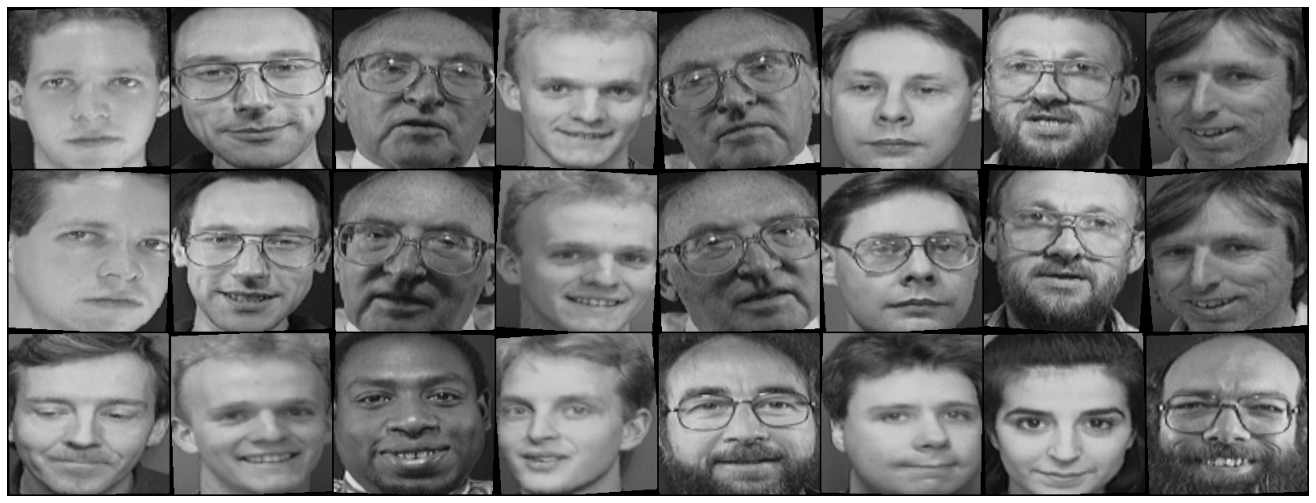

In [33]:
anch_imgs, pos_imgs, neg_imgs = next(iter(train_dl))
concat = torch.cat((anch_imgs, pos_imgs, neg_imgs), 0)
plt.figure(figsize=(24,9))
imshow(torchvision.utils.make_grid(concat, nrow=8))

## Model: Triple Network 

In [ ]:
class TripletWork(nn.Module):
    
    def __init__(self, cnn, embed_size):
        super(TripletbWork, self).__init__()
        num_features = 
    
    
    
    def forward